In [9]:
import pandas as pd

df = pd.read_csv('/content/data.csv')
df = df.drop(columns=['Search key'])
df.head()

,Sl no,Tweets,Feeling
0,1,"#1: @fe ed ""RT @MirayaDizon1: Time is ticking...",happy
1,2,"#2: @蓮花 &はすか ed ""RT @ninjaryugo: ＃コナモンの日 だそうで...",happy
2,3,"#3: @Ris ♡ ed ""Happy birthday to one smokin h...",happy
3,4,"#4: @월월 [씍쯴사랑로봇] jwinnie is the best, cheer u...",happy
4,5,"#5: @Madhurima wth u vc♥ ed ""Good morning dea...",happy


In [10]:
category = pd.get_dummies(df.Feeling)
df_baru = pd.concat([df, category], axis=1)
df_baru = df_baru.drop(columns='Feeling')
df_baru

,Sl no,Tweets,angry,disgust,fear,happy,sad,surprise
0,1,"#1: @fe ed ""RT @MirayaDizon1: Time is ticking...",0,0,0,1,0,0
1,2,"#2: @蓮花 &はすか ed ""RT @ninjaryugo: ＃コナモンの日 だそうで...",0,0,0,1,0,0
2,3,"#3: @Ris ♡ ed ""Happy birthday to one smokin h...",0,0,0,1,0,0
3,4,"#4: @월월 [씍쯴사랑로봇] jwinnie is the best, cheer u...",0,0,0,1,0,0
4,5,"#5: @Madhurima wth u vc♥ ed ""Good morning dea...",0,0,0,1,0,0
...,...,...,...,...,...,...,...,...
10012,10016,"Tweet #85: @Matteo tweeted ""@GameSpot @Frannkc...",1,0,0,0,0,0
10013,10017,"Tweet #86: @𝐚𝐧𝐢𝐬𝐭𝐨𝐧 tweeted ""@BRATgiirl_ that’...",1,0,0,0,0,0
10014,10018,"Tweet #87: @Chowkidar Ricky Sharma tweeted ""@M...",1,0,0,0,0,0
10015,10019,"Tweet #88: @Katoe.EXE tweeted ""u know what i h...",1,0,0,0,0,0


In [12]:
tweets = df_baru['Tweets'].values
label = df_baru[['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise']].values

In [14]:
from sklearn.model_selection import train_test_split
tweets_latih, tweets_test, label_latih, label_test = train_test_split(tweets, label, test_size=0.2)

In [18]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=10000, oov_token='x')
tokenizer.fit_on_texts(tweets_latih)
tokenizer.fit_on_texts(tweets_test)

sekuens_latih = tokenizer.texts_to_sequences(tweets_latih)
sekuens_test = tokenizer.texts_to_sequences(tweets_test)

padded_latih = pad_sequences(sekuens_latih)
padded_test = pad_sequences(sekuens_test)

In [20]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=10000, output_dim=16),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')
])

model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [21]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.9):
      print("\nAkurasi telah mencapai >90%!")
      self.model.stop_training = True
callbacks = myCallback()

In [22]:
num_epochs = 30
history = model.fit(padded_latih, label_latih, epochs=num_epochs, callbacks=[callbacks], 
                    validation_data=(padded_test, label_test), verbose=2)

Epoch 1/30
251/251 - 19s - loss: 1.3636 - accuracy: 0.4233 - val_loss: 1.1381 - val_accuracy: 0.5180 - 19s/epoch - 77ms/step
Epoch 2/30
251/251 - 16s - loss: 0.8084 - accuracy: 0.6728 - val_loss: 0.7442 - val_accuracy: 0.7156 - 16s/epoch - 66ms/step
Epoch 3/30
251/251 - 16s - loss: 0.3883 - accuracy: 0.8615 - val_loss: 0.5763 - val_accuracy: 0.8204 - 16s/epoch - 65ms/step
Epoch 4/30

Akurasi telah mencapai >90%!
251/251 - 16s - loss: 0.2086 - accuracy: 0.9359 - val_loss: 0.7237 - val_accuracy: 0.8024 - 16s/epoch - 65ms/step


In [23]:
import matplotlib.pyplot as plt

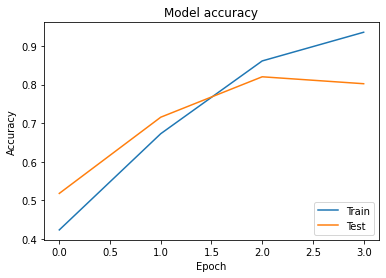

In [28]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

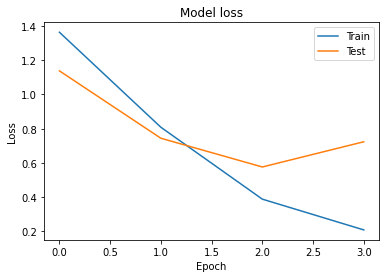

In [29]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()